In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz 
from IPython.display import Image 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression



In [3]:
from google.colab import files
uploaded = files.upload()

Saving updated ewaste.csv to updated ewaste.csv


In [4]:
import io
data = pd.read_csv(io.BytesIO(uploaded['updated ewaste.csv']))

In [5]:
 
data["\tDistrict"] = data["\tDistrict"].astype('category')
data["\tDistrict_cat"] = data["\tDistrict"].cat.codes
data.drop("\tDistrict", axis=1, inplace=True)

In [6]:
data

,\tGender,Age,\tEducational Level,Income_level,ewaste_awr,SUB1,ewaste_laws_awr,Q8Air conditioning,Q8Laptops,Q8LED bulbs,...,satis_ewaste_mgt,convenience,Q18O1,Q18O2,Q18O3,Q19HH,Q19E,more_awr,will_to_pay,\tDistrict_cat
0,1,31,3,4,1,1,0,4,3,1,...,-0.5,0.0,1,2,3,1.0,1.0,1,0,6
1,1,25,3,3,1,2,1,4,4,4,...,-1.0,0.5,1,2,3,0.5,1.0,1,0,21
2,1,55,3,7,1,1,0,4,4,2,...,0.0,-0.5,2,0,0,1.0,1.0,1,0,6
3,1,78,3,1,0,0,0,1,1,1,...,0.0,0.5,2,0,0,0.5,0.5,1,0,19
4,0,25,3,3,1,1,0,4,3,1,...,0.0,0.0,3,0,0,1.0,1.0,1,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,1,23,4,1,1,1,0,4,4,2,...,-0.5,0.5,2,0,0,1.0,1.0,1,0,3
723,0,24,4,1,1,1,0,1,2,1,...,0.5,0.5,2,0,0,1.0,1.0,1,1,3
724,1,25,4,1,0,0,0,2,1,1,...,-0.5,-1.0,1,2,3,-1.0,-1.0,1,0,3
725,1,25,4,2,1,1,0,1,4,2,...,-0.5,0.5,1,2,3,-1.0,-1.0,1,0,3


In [7]:
df_x=data
df_y=data.pop('will_to_pay')


In [8]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)

In [9]:
elm_fit=rfe.fit(df_x, df_y)

In [10]:
elm_fit.support_

array([False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True,  True, False, False, False,  True, False,
       False,  True,  True, False, False])

In [11]:
selected=df_x.columns[elm_fit.support_]
selected 

Index(['ewaste_awr', 'SUB1', 'Q10O5', 'Q10O6', 'SUB2',
       'Q15Large_printing_machine', 'Q15Video_camera', 'Q18O1', 'Q19HH',
       'Q19E'],
      dtype='object')

In [12]:
df_x[selected]


,ewaste_awr,SUB1,Q10O5,Q10O6,SUB2,Q15Large_printing_machine,Q15Video_camera,Q18O1,Q19HH,Q19E
0,1,1,0,0,5,1,1,1,1.0,1.0
1,1,2,0,0,3,1,1,1,0.5,1.0
2,1,1,0,0,5,0,0,2,1.0,1.0
3,0,0,0,0,5,1,1,2,0.5,0.5
4,1,1,0,0,2,1,1,3,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
722,1,1,0,0,4,0,0,2,1.0,1.0
723,1,1,0,0,0,1,0,2,1.0,1.0
724,0,0,0,0,3,0,0,1,-1.0,-1.0
725,1,1,5,0,1,1,0,1,-1.0,-1.0


In [13]:
x=df_x[selected].values
y=df_y.values

In [14]:
feature_cols = ['ewaste_awr','Q10O5','Q10O6','Q15Large_printing_machine','Q15Video_camera','Q18O1','Q19HH','Q19E']
X = data[feature_cols]  
Y = df_y

In [15]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size=0.3, random_state=1)

In [16]:
clf = DecisionTreeClassifier()
 
clf = clf.fit(X_train,Y_train)

 
y_pred = clf.predict(X_test)

In [17]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.6073059360730594


In [18]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
!pip install --upgrade scikit-learn==0.20.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.4 MB 5.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.20.3 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.20.3 which is incompatible.


In [20]:
 pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


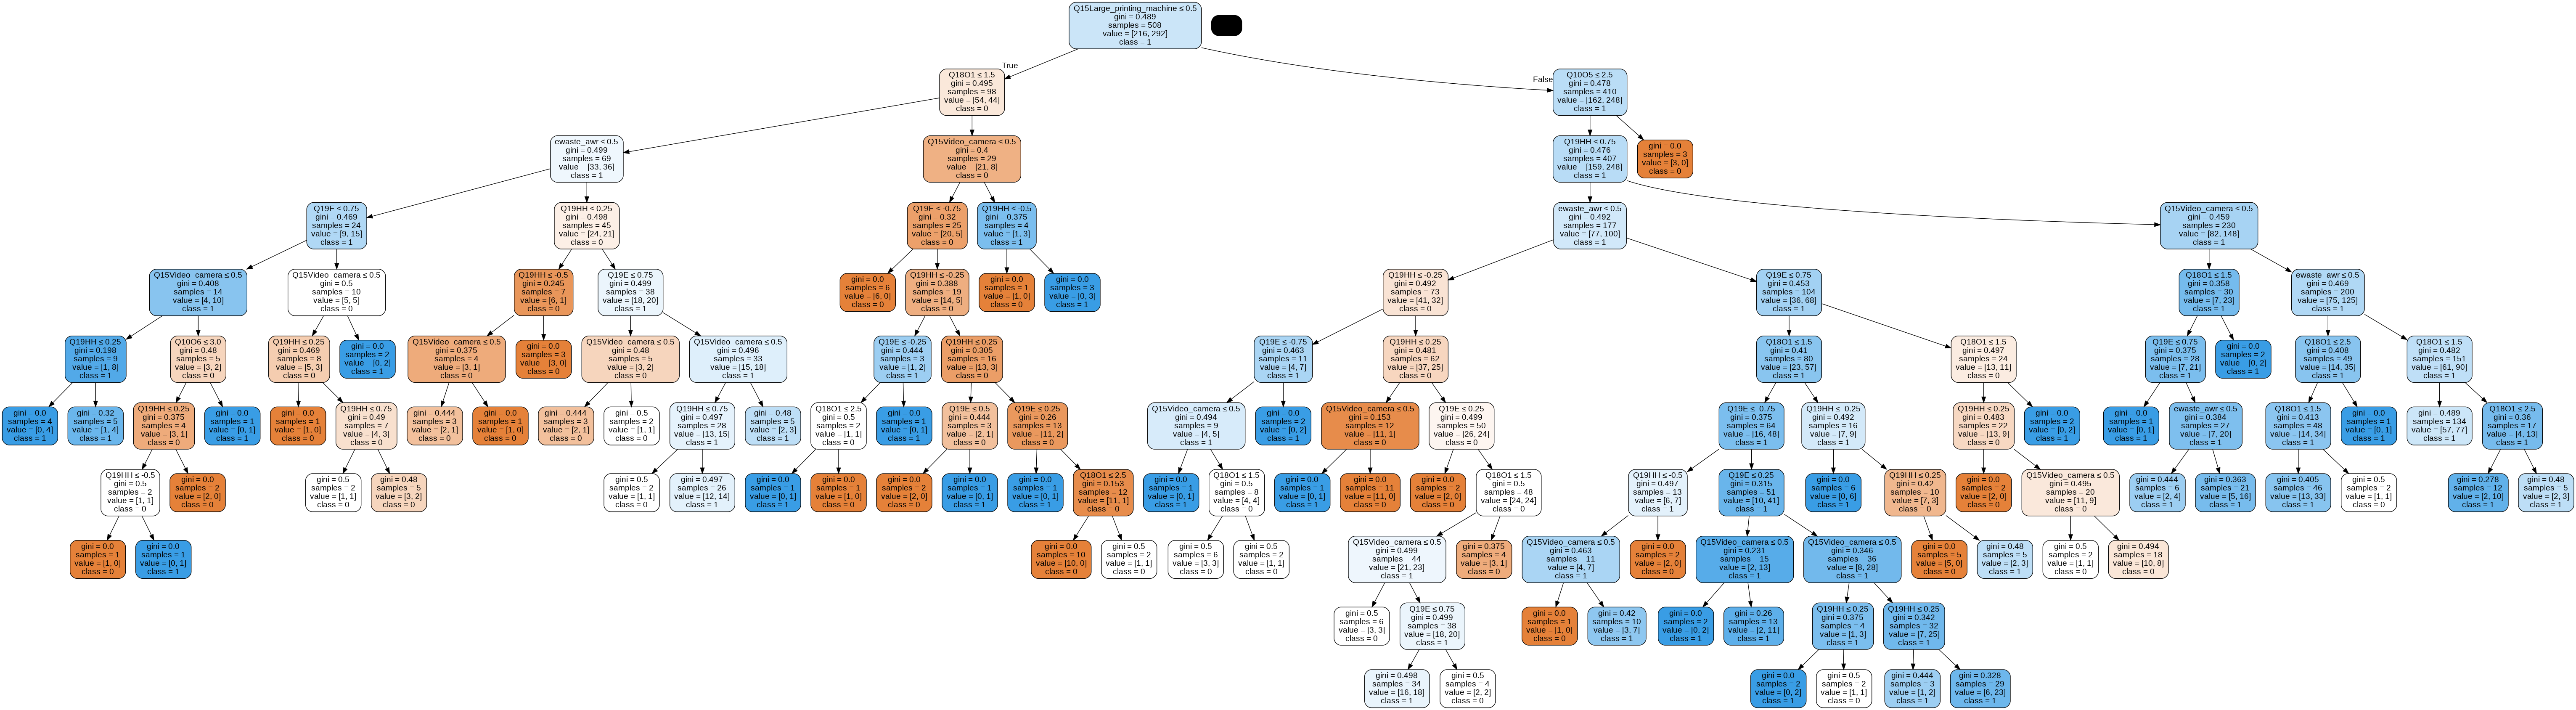

In [21]:
 
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [24]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.634703196347032


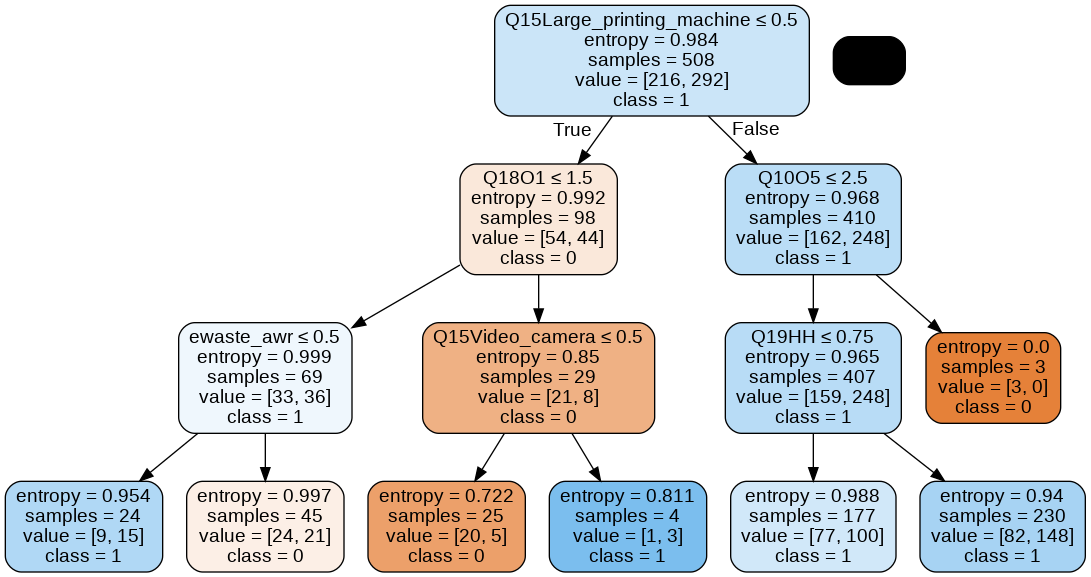

In [23]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('credit.png')
Image(graph.create_png())
